In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 과정 참고 : https://velog.io/@dayday/%EC%9E%90%EC%97%B0%EC%96%B4%EC%B2%98%EB%A6%AC-%EA%B0%9C%EC%9A%94-%ED%85%8D%EC%8A%A4%ED%8A%B8-%EB%B6%84%EB%A5%98

In [2]:
file_path = "C:/Users/Admin/Desktop/stt_data/post_tagging_sample_komoran.csv"

In [4]:
train_data = pd.read_csv(file_path, encoding='utf-8')


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426067 entries, 0 to 1426066
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1426067 non-null  object
 1   label      1426067 non-null  int64 
 2   tokenized  1426067 non-null  object
 3   main_pos   1416791 non-null  object
dtypes: int64(1), object(3)
memory usage: 43.5+ MB


### 불용어 제거 과정에서 문장에 의미가 없는 것만 있어서 main_pos 가 NaN으로 처리된 값들을 발견함

In [6]:
# 결측값 제거
print("before: ", train_data.shape)
train_data.dropna(inplace=True)
print("after: ", train_data.shape)
train_data.head(10)

before:  (1426067, 4)
after:  (1416791, 4)


,text,label,tokenized,main_pos
0,"예, 아유 수고하세요.",0,"예 , 아유 수고 하 시 어요 .",수고
1,여쭤볼려고 그러는데요.,0,여쭈 어 보 ㄹ려고 그렇 는데요 .,여쭈 그렇
2,그 지금 그거 뭘로 들어가 있어요?,0,그 지금 그것 뭐 ㄹ 로 들어가 아 있 어요 ?,지금 그것 뭐 들어가
3,"예, 알겠습니다.",0,"예 , 알 겠 습니다 .",알
4,다른 더 확인해 드릴 것은 없으십니까?,0,다른 더 확인 하 아 드릴 것 은 없 으시 ㅂ니까 ?,더 확인 드릴 없
5,그럼 좋은 하루 보내세요.,0,그럼 좋은 하루 보내 시 어요 .,좋은 하루 보내
7,"네, 안녕하세요. 무엇을 도와드릴까요?",0,"네 , 안녕하세요 . 무엇 을 돕 아 드리 ㄹ까요 ?",안녕하세요 돕
8,"예, 통장에 교육청소년과로 해서 찍혔는데.",0,"예 , 통장 에 교육 청소년 과 로 하 아서 찍히 었 는데 .",통장 교육 청소년 찍히
10,혹시 보내주셨나 해서요.,0,혹시 보내 어 주 시 었 나 하 아서요 .,보내
11,교육청소년과로 해서 입금이 됐다는 말씀이십니까?,0,교육 청소년 과 로 하 아서 입금 이 되 었 다는 말씀 이 시 ㅂ니까 ?,교육 청소년 입금 되 말씀


## 각 상담의 문자 길이 분포

TypeError: LogScale.__init__() got an unexpected keyword argument 'nonposy'

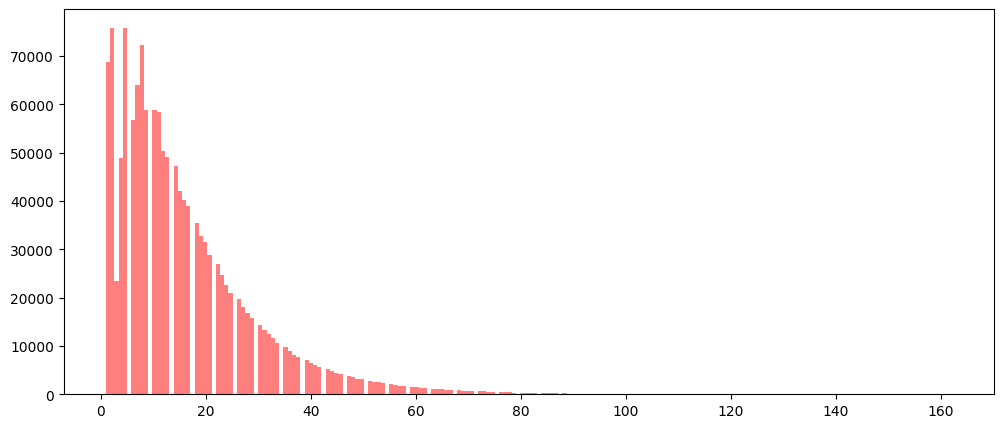

In [7]:
train_length = train_data['main_pos'].apply(len)

plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
# plt.yscale('log')
plt.yscale('log', nonposy='clip')
plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [8]:
# 통계 값 확인
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 162
리뷰 길이 최소 값: 1
리뷰 길이 평균 값: 15.99
리뷰 길이 표준편차: 13.40
리뷰 길이 중간 값: 12.0
리뷰 길이 제 1 사분위: 7.0
리뷰 길이 제 3 사분위: 22.0


{'whiskers': [<matplotlib.lines.Line2D at 0x21d87f31460>,
 'caps': [<matplotlib.lines.Line2D at 0x21d8803d820>,
 'boxes': [<matplotlib.lines.Line2D at 0x21d87f31d00>],
 'medians': [<matplotlib.lines.Line2D at 0x21d8803de80>],
 'fliers': [<matplotlib.lines.Line2D at 0x21d8803f0e0>],
 'means': [<matplotlib.lines.Line2D at 0x21d8803e270>]}

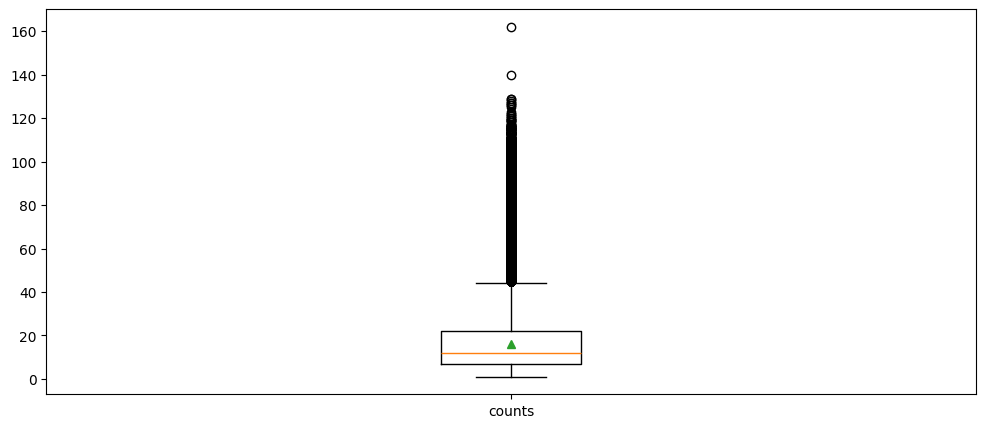

In [8]:
# 박스플롯
plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
             tick_labels=['counts'],
             showmeans=True)

## TF-IDF 벡터화

In [9]:
RANDOM_SEED = 73
TEST_SPLIT = 0.25
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [8]:
train_data.head()

,text,label,tokenized,main_pos
0,"예, 아유 수고하세요.",0,"예 , 아유 수고 하 시 어요 .",수고
1,여쭤볼려고 그러는데요.,0,여쭈 어 보 ㄹ려고 그렇 는데요 .,여쭈 그렇
2,그 지금 그거 뭘로 들어가 있어요?,0,그 지금 그것 뭐 ㄹ 로 들어가 아 있 어요 ?,지금 그것 뭐 들어가
3,"예, 알겠습니다.",0,"예 , 알 겠 습니다 .",알
4,다른 더 확인해 드릴 것은 없으십니까?,0,다른 더 확인 하 아 드릴 것 은 없 으시 ㅂ니까 ?,더 확인 드릴 없


In [10]:
vectorizer = TfidfVectorizer()

main_pos = list(train_data['main_pos'])
labels = list(train_data['label'])

X = vectorizer.fit_transform(main_pos)
Y = np.array(labels)

In [10]:
x_train, x_eval, y_train, y_eval = train_test_split(X, Y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

In [41]:
lgs = LogisticRegression(class_weight='balanced', max_iter=5000)
lgs.fit(x_train, y_train)
predicted = lgs.predict(x_eval)
print("Accuracy: %f" % lgs.score(x_eval, y_eval))

Accuracy: 0.464271


## WORD2VEC lightgbm

In [11]:
train_data2 = pd.read_csv(file_path)

texts = list(train_data2['text'])
sentences = []

for text in texts:
    sentences.append(text.split())

sentences

[['예,', '아유', '수고하세요.'],
 ['여쭤볼려고', '그러는데요.'],
 ['그', '지금', '그거', '뭘로', '들어가', '있어요?'],
 ['예,', '알겠습니다.'],
 ['다른', '더', '확인해', '드릴', '것은', '없으십니까?'],
 ['그럼', '좋은', '하루', '보내세요.'],
 ['여보세요.'],
 ['네,', '안녕하세요.', '무엇을', '도와드릴까요?'],
 ['예,', '통장에', '교육청소년과로', '해서', '찍혔는데.'],
 ['네,', '네.'],
 ['혹시', '보내주셨나', '해서요.'],
 ['교육청소년과로', '해서', '입금이', '됐다는', '말씀이십니까?'],
 ['출처를', '잘', '모르겠어가지고.'],
 ['혹시', '고객님', '뭐', '학자금', '대출', '이자', '관련으로', '신청하신', '적은', '없으십니까?'],
 ['이자요?'],
 ['예,', '예,', '학자금', '대출', '이자', '이런', '내용으로', '신청하신', '적은', '없으셨어요,', '고객님?'],
 ['국가', '장학금으로', '신청했는데.'],
 ['네,', '네.'],
 ['20', '20', '28만', '원밖에', '안', '돼서.'],
 ['네,',
  '그렇습니다.',
  '죄송합니다만',
  '그러면',
  '제가',
  '해당',
  '부서로',
  '좀',
  '문의를',
  '해드릴',
  '텐데',
  '청',
  '교육',
  '청소년과로만',
  '확인이',
  '되시는',
  '건가요?'],
 ['아,', '혹시', '언제', '얼마가', '입금이', '됐는지', '확인', '가능하십니까?'],
 ['12월', '28일', '날', '280000원', '280200원인가', '왔거든요.'],
 ['아,', '그러세요.', '잠시만', '기다려주시겠습니까?', '제가', '부서로', '문의해서', '안내해드리겠습니다.'],
 ['네.'],
 ['안녕하세요,'],
 ['선

num_features : 각 단어에 대해 임베딩된 벡터의 차원

min_word_count : 모델에 의미 있는 단어를 가지고 학습하기 위해 적은 빈도 수의 단어들은 학습하지 않는다.

num_workers : 모델 학습 시 사용할 프로세스 개수를 지정한다.

context : 컨텍스트 윈도우 크기를 지정한다.

downsampling : 학습을 수행할 때 빠른 학습을 위해 정답 단어 라벨에 대한 다운샘플링 비율을 지정한다. 일반적으로 0.001이 가장 성능이 좋다고 한다.

In [12]:
num_features = 100    
min_word_count = 20   
num_workers = 4       
context = 10          
down_sampling = 1e-3 

In [29]:
from gensim.models import Word2Vec
from tqdm import tqdm
import lightgbm as lgb



In [12]:
model = Word2Vec(sentences = sentences, vector_size = num_features, window = 5, min_count = 5, workers = num_workers, sg = 0)

In [13]:
model.wv.vectors.shape

(82303, 100)

In [14]:
model.wv.most_similar('문의')

[('문의를', 0.6466290354728699),
 ('건의', 0.5753498673439026),
 ('연락', 0.5742620229721069),
 ('문의해', 0.5694882273674011),
 ('문의좀', 0.5244975686073303),
 ('전화', 0.5175337195396423),
 ('상의', 0.4963213801383972),
 ('상담해', 0.494206041097641),
 ('문의전화', 0.49188828468322754),
 ('요청해', 0.49062612652778625)]

In [15]:
def get_features(words, model, num_features):
    feature_vector = np.zeros((num_features),dtype=np.float32)

    num_words = 0
    index2word_set = set(model.wv.index_to_key)
    for w in words:
        if w in index2word_set:
            num_words += 1
            feature_vector = np.add(feature_vector, model.wv[w])

    feature_vector = np.divide(feature_vector, num_words)
    return feature_vector

In [16]:
def get_dataset(reviews, model, num_features):
    dataset = list()
    
    for s in tqdm(reviews):
        dataset.append(get_features(s, model, num_features))

    review_feature_vecs = np.stack(dataset)
    
    return review_feature_vecs


In [17]:
# 실행
temp = sentences[:10000]
test_data_vecs = get_dataset(temp, model, num_features)

  0%|          | 0/10000 [00:00<?, ?it/s]C:\Users\Admin\AppData\Local\Temp\ipykernel_91292\647232008.py:11: RuntimeWarning: invalid value encountered in divide
  feature_vector = np.divide(feature_vector, num_words)
100%|██████████| 10000/10000 [00:49<00:00, 202.13it/s]


In [18]:
print(test_data_vecs)

[[-0.19415188  1.5129458   0.16318935 ... -0.34603497 -0.73786515
   1.4980758 ]
 [ 0.55537605 -0.4547839   0.74676776 ... -0.334727   -2.3428435
  -0.46776915]
 [-0.23077095  0.54224205  0.8046918  ...  0.7301187   0.10550717
  -0.46725023]
 ...
 [ 0.10795711 -1.0469052   0.84572977 ...  0.22886096  0.5032566
  -0.19039053]
 [-0.1709794  -0.27618328  0.7977078  ...  0.3126433   0.09880754
  -0.20820223]
 [ 0.47061807  0.07248227 -0.68884355 ...  1.1879761  -0.8102719
   0.1400307 ]]


In [27]:
!pip install lightgbm==3.3.2

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/1.0 MB 24.4 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.5.0
    Uninstalling lightgbm-4.5.0:
      Successfully uninstalled lightgbm-4.5.0


  You can safely remove it manually.


In [30]:
X = test_data_vecs
y = np.array(labels[:10000])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=RANDOM_SEED)

lgbm = lgb.LGBMClassifier(n_estimators=500)
lgbm.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=[(X_test,y_test)])

TypeError: LGBMClassifier.fit() got an unexpected keyword argument 'early_stopping_rounds'

In [21]:
model.score()

TypeError: Word2Vec.score() missing 1 required positional argument: 'sentences'